<div class='alert alert-block alert-warning
            ' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center> Exploratory Data Analysis (EDA) with Pandas: [20 points] </center> </b>
</div>

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    <h4>Load and Inspect any Data that you find:</h4> Load a dataset (e.g., CSV) using Pandas. Display basic information about the dataset, such as the number of rows and columns, data types, and the first few rows of data.
</div>

In [330]:
import numpy as np
import pandas as pd
import missingno as msno
import datetime as dt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [331]:
pd.set_option('display.max.columns', 21)
pd.set_option('display.max.rows', 200)

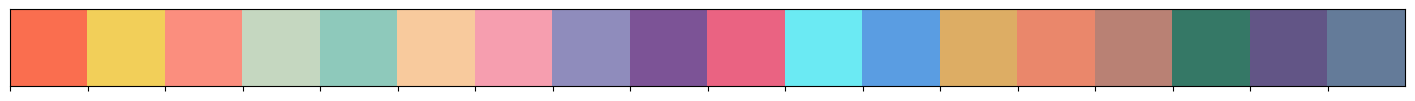

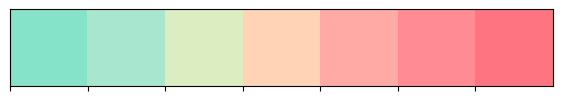

In [332]:
long_palette = ["#FA6E4F", "#F2CF59", "#FB8E7E", "#C5D7C0", "#8EC9BB", "#F8CA9D", '#F69EAF', '#8F8CBC', '#7C5396', '#EA6382', '#6BEAF3', '#5A9DE2', '#DDAD64', '#EA876B', '#B98174', '#357866', '#625586', '#647B99']
custom_palette = sns.color_palette(long_palette)
watermelon_colors = ['#84e3c8', '#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94', '#ff7480']
custom_palette3 = sns.color_palette(watermelon_colors)
sns.palplot(long_palette)
sns.palplot(watermelon_colors)

In [333]:
df = pd.read_csv('bankData.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,NaN,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,NaN,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,NaN,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,NaN,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [334]:
print(len(df['age'] > 0))

41188


In [335]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,NaN,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,NaN,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,NaN,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,NaN,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [336]:
df.shape

(41188, 21)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41171 non-null  float64
 1   job             41184 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [338]:
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62.0,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,1
41179,64.0,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,151,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41180,36.0,admin.,married,university.degree,no,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,0
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0


<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    <h4>Data Cleaning: Clean the dataset by handling missing values, duplicates, or outliers.</h4>
</div>

In [339]:
pd.DataFrame(df.isnull().sum(), columns=['No of missing values'])

,No of missing values
age,17
job,4
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


<Axes: >

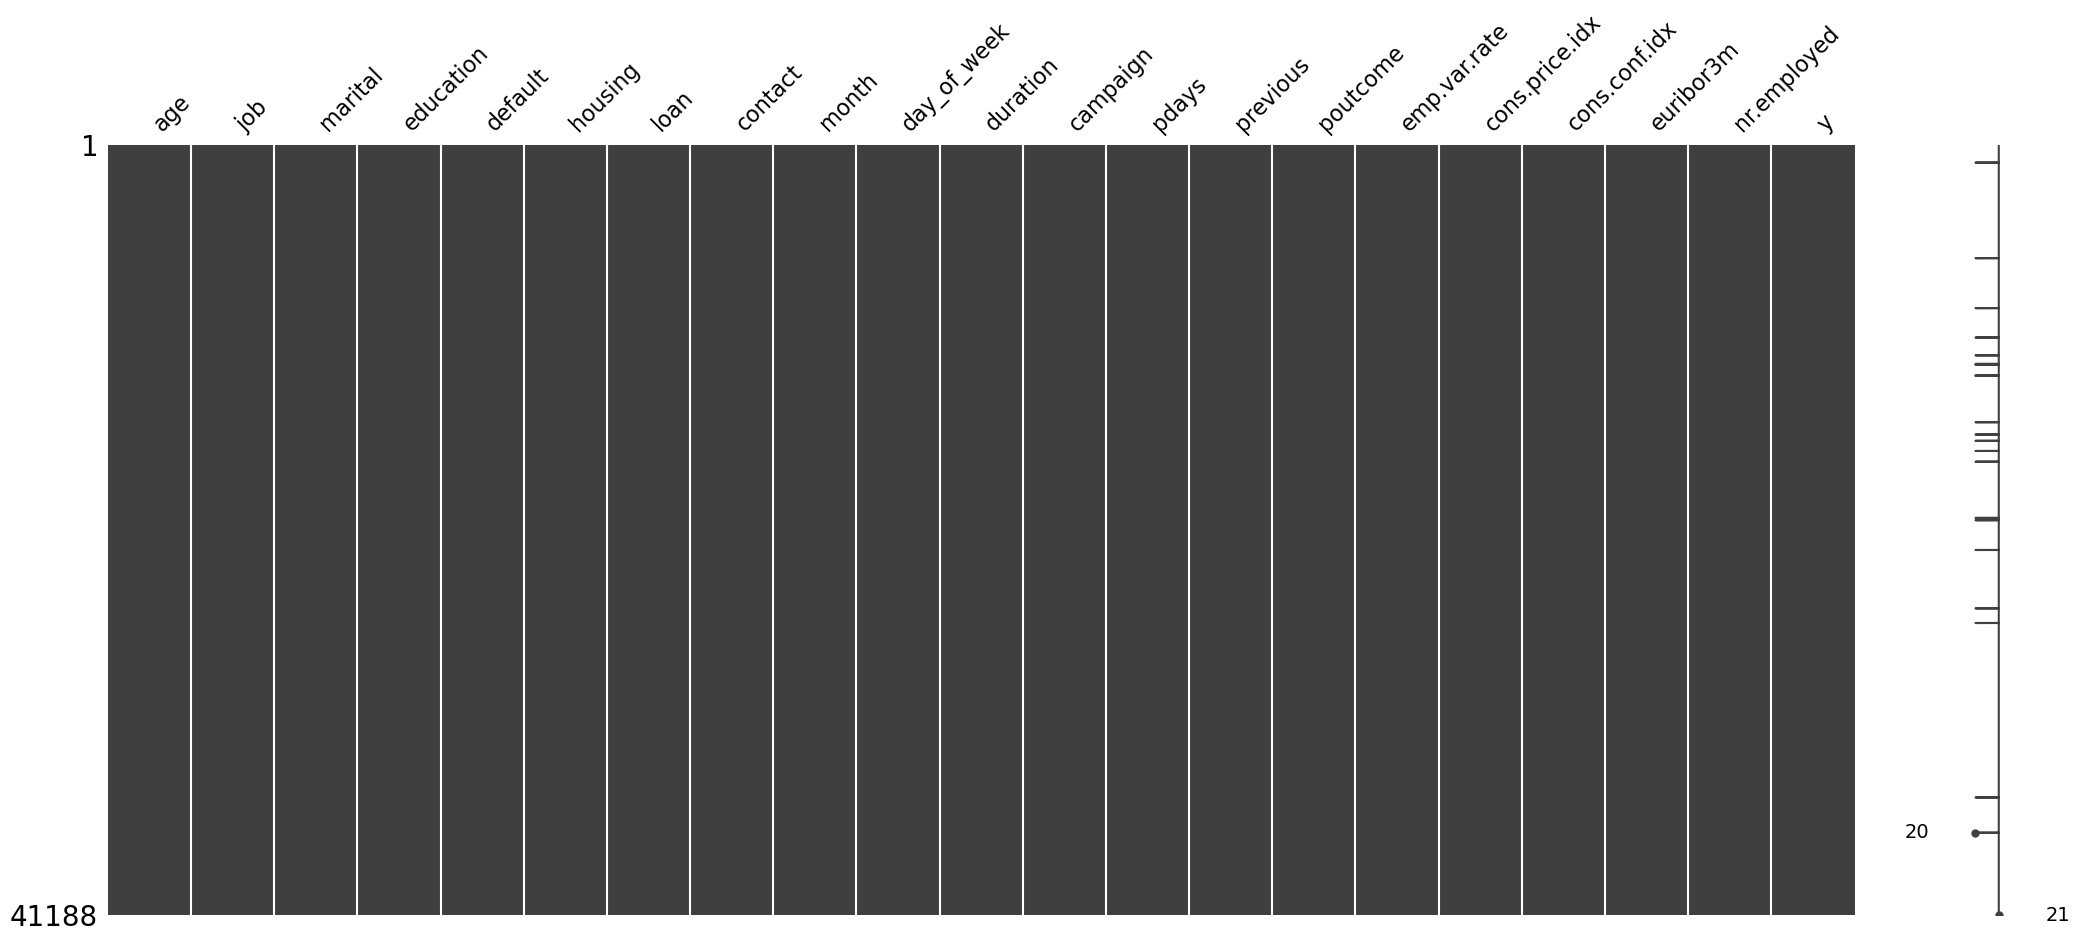

In [340]:
msno.matrix(df.sample(41188))

<Axes: >

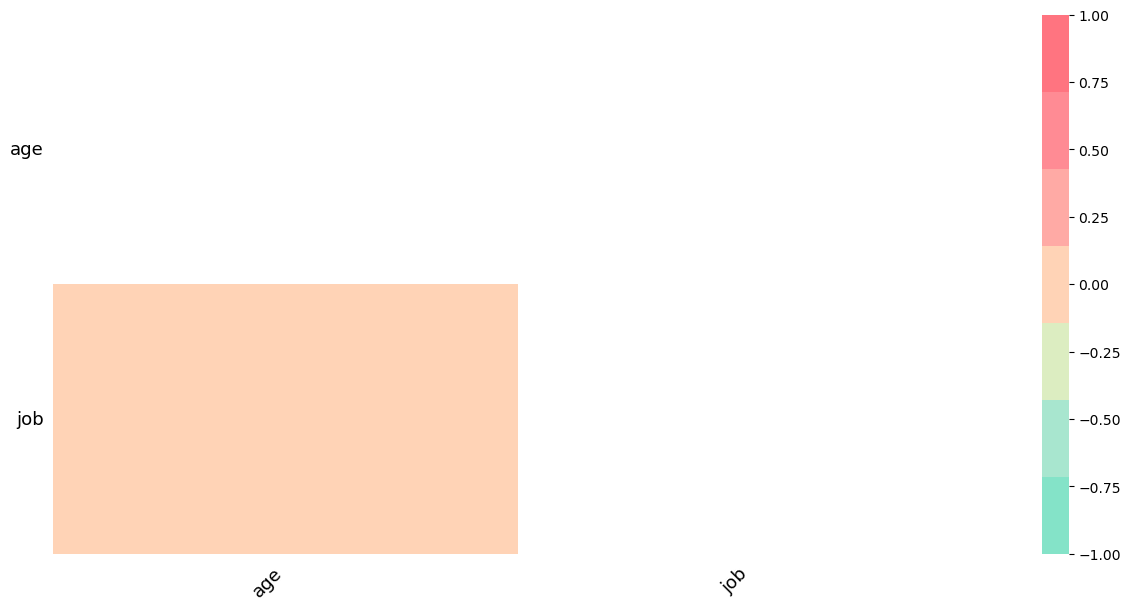

In [341]:
cmap = ListedColormap(custom_palette3)
msno.heatmap(df, cmap=cmap, figsize=(15, 7), fontsize=13)

C:\Users\Зангар\AppData\Local\Temp\ipykernel_14048\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

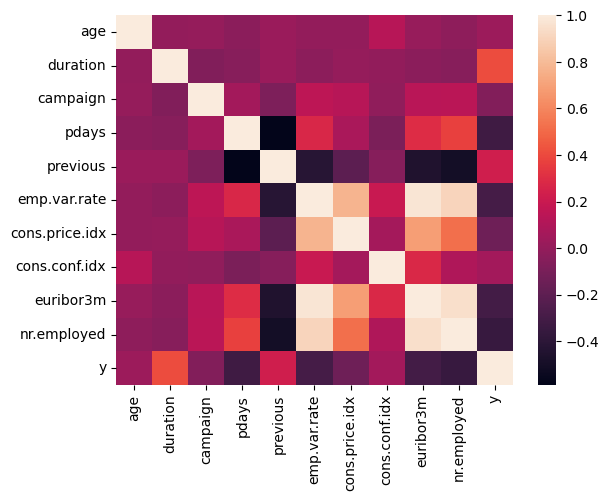

In [342]:
sns.heatmap(df.corr())

In [343]:
df['age'].fillna(df['age'].mean(), inplace = True)

In [344]:
df.dropna(inplace=True) # drop null values
df.shape

(41184, 21)

<Axes: >

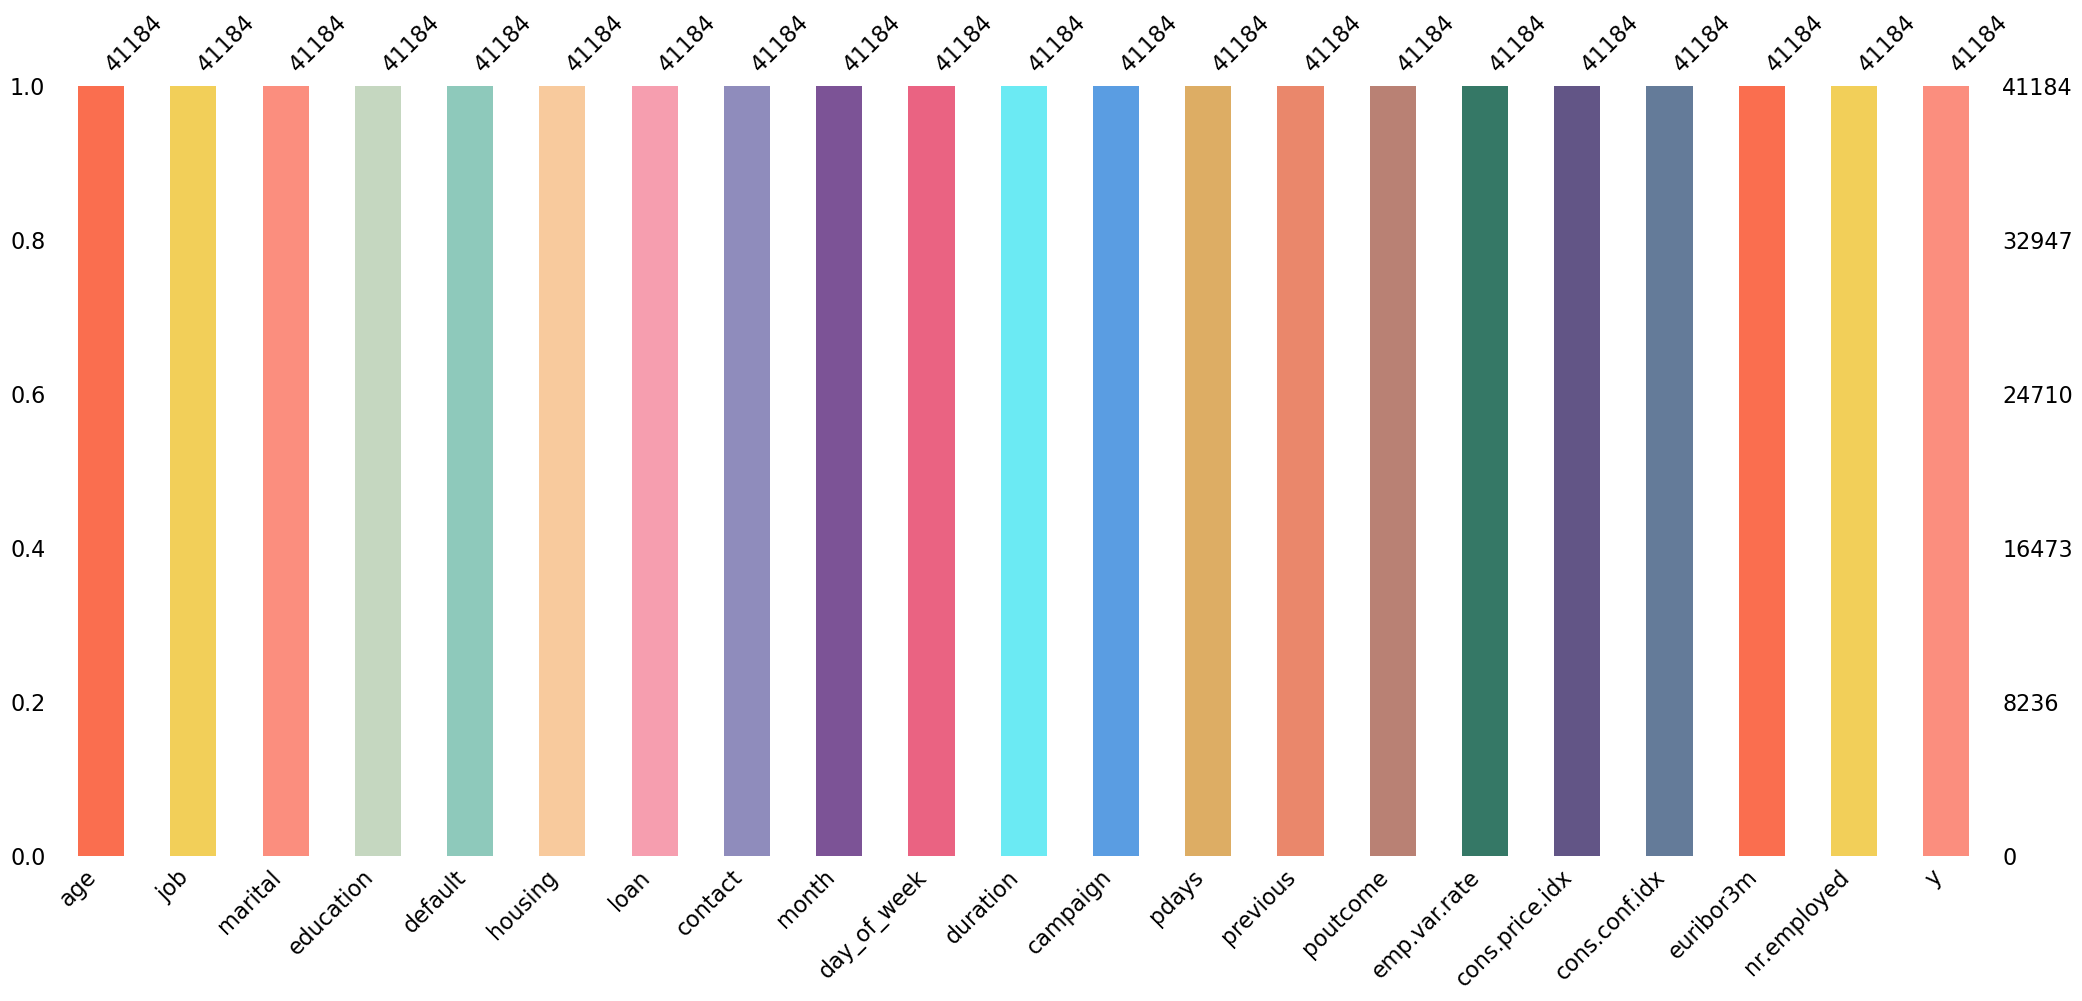

In [345]:
msno.bar(df.sample(41184), color=custom_palette)

In [346]:
print(len(df[df.isnull().sum(axis=1) > 4]))
drop_idx = df[df.isnull().sum(axis=1) > 4].index.tolist()
df.drop(drop_idx, inplace=True)

0


<img src='https://www.mdpi.com/applsci/applsci-08-02118/article_deploy/html/images/applsci-08-02118-g004.png'> 
<div style="font-size: 13pt; font-family: verdana; color: #08415C">  
    <h4>Interquartile section (IQR). IQR is a number that indicates the spread of the average fraction (i.e., the average value of 50%) of the data set and allows you to exclude an outlier. IQR is the difference between Q3 and Q1. IQR = Q3 - Q1 visitors. Outliers are, simply put, those data values that are outside the following intervals: Q1–1.5 x IQR and Q3 + 1.5 x IQR.</h4> 
</div> 
<div style="font-size: 13pt; font-family: verdana; color: #08415C">  
    <h4>Интерквартильный размах (IQR). IQR — число, которое показывает разброс средней половины (т.е. средние 50%) набора данных и помогает определить выбросы. IQR — это разница между Q3 и Q1. IQR = Q3 - Q1 IQR. Выбросы — это, проще говоря, те значения данных, которые находятся за пределами следующих интервалов: Q1–1.5 x IQR и Q3 + 1.5 x IQR.</h4> 
</div>


In [347]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR 
    lower_limit = Q1 - 1.5 * IQR 
    return upper_limit, lower_limit, Q1, Q3

upper, lower, Q1, Q3 = outliers(df, "age")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
print('Q1: ', Q1)
print('Q3: ', Q3)


Upper whisker:  69.5
Lower Whisker:  9.5
Q1:  32.0
Q3:  47.0


In [348]:
df[(df['age'] < lower) | (df['age'] > upper)] 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27713,70.0,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,187,3,999,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,1
27757,76.0,retired,married,university.degree,no,no,yes,cellular,mar,thu,167,9,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,0
27780,73.0,retired,married,university.degree,no,yes,no,cellular,mar,tue,179,1,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,0
27800,88.0,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,48,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,0
27802,88.0,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,266,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84.0,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,138,4,3,1,success,-1.1,94.601,-49.5,1.000,4963.6,0
40996,81.0,retired,married,basic.4y,no,yes,no,cellular,oct,wed,621,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,1
41004,80.0,retired,married,professional.course,no,yes,no,cellular,oct,thu,411,1,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,1
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [349]:
new_outliers_df = df[(df['age'] < lower) | (df['age'] > upper)].index.tolist()
new_outliers_df

[27713,
 27757,
 27780,
 27800,
 27802,
 27805,
 27808,
 27810,
 27811,
 27812,
 27813,
 27814,
 27815,
 27816,
 27817,
 27818,
 27826,
 27837,
 27838,
 27844,
 27851,
 27875,
 27879,
 27902,
 27930,
 27950,
 27951,
 27963,
 28220,
 28221,
 28312,
 28456,
 28504,
 28530,
 28540,
 28586,
 28619,
 28732,
 28773,
 29225,
 29263,
 29498,
 29625,
 29668,
 29682,
 29973,
 29977,
 29981,
 29987,
 29990,
 30000,
 30004,
 30006,
 30072,
 30078,
 30079,
 30088,
 30103,
 30110,
 30133,
 30171,
 30214,
 30225,
 30227,
 30241,
 30334,
 30335,
 30390,
 30430,
 30460,
 30589,
 35833,
 35848,
 35856,
 35878,
 35973,
 36183,
 36285,
 36311,
 36383,
 36384,
 36816,
 36998,
 37136,
 37137,
 37170,
 37186,
 37190,
 37192,
 37193,
 37195,
 37206,
 37207,
 37213,
 37219,
 37227,
 37235,
 37237,
 37239,
 37257,
 37260,
 37316,
 37341,
 37355,
 37371,
 37403,
 37454,
 37455,
 37472,
 37479,
 37493,
 37505,
 37509,
 37512,
 37525,
 37532,
 37545,
 37568,
 37570,
 37586,
 37597,
 37601,
 37602,
 37604,
 37635,


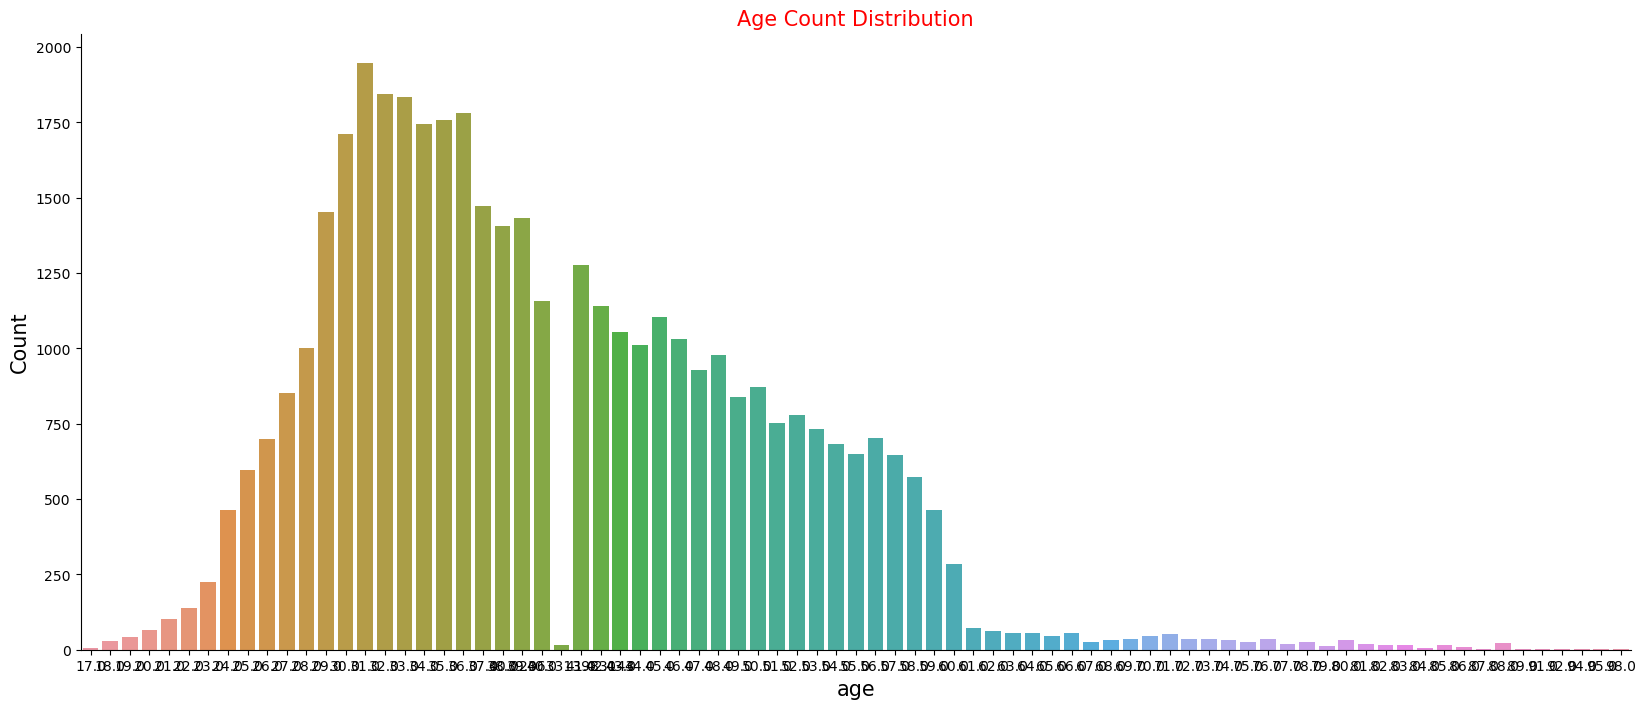

In [350]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=df)

ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15, color='red')
sns.despine() # Removing Spines: Spines are the lines that form the borders of the plot

In [351]:
df.drop(new_outliers_df, inplace=True)
df.shape

(40715, 21)

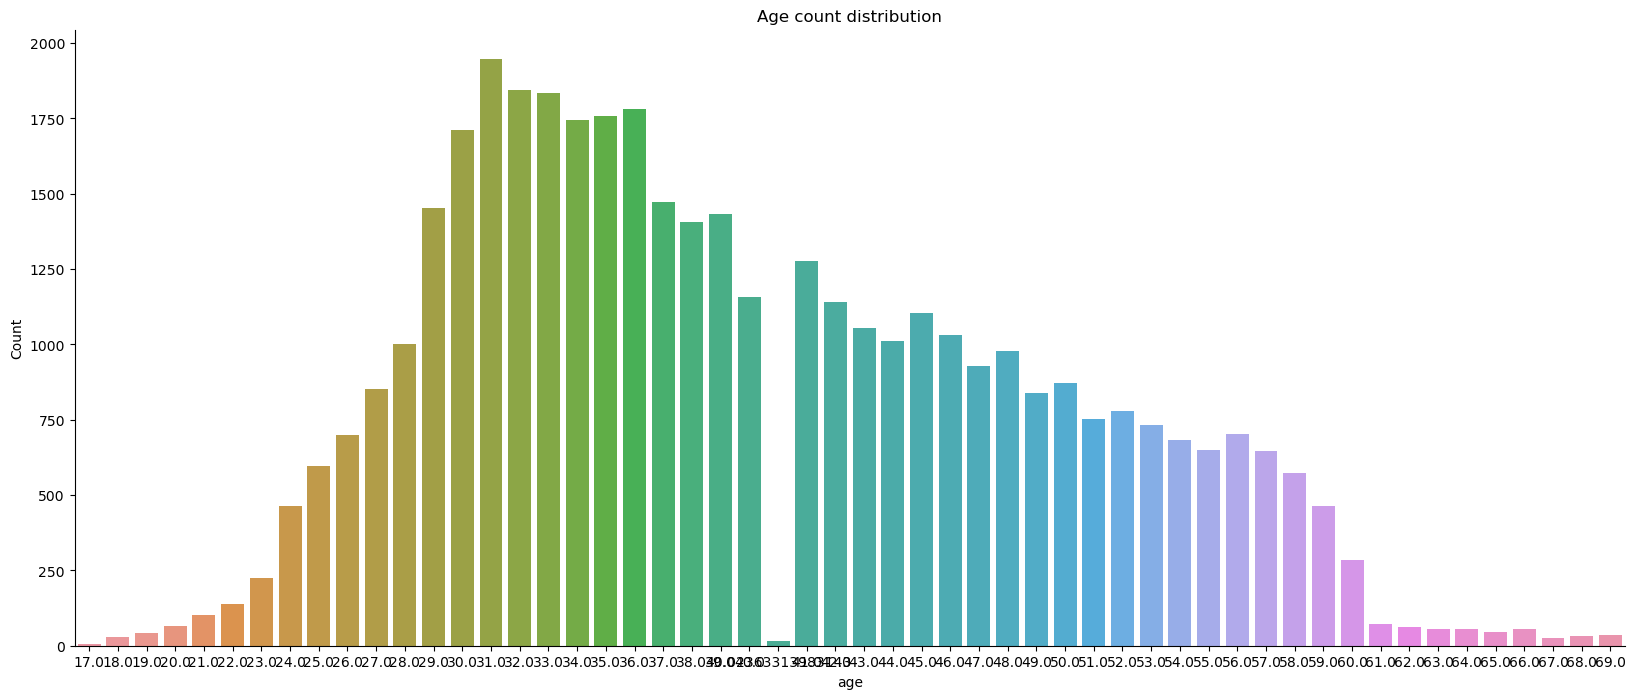

In [352]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=df)

ax.set_xlabel('age')
ax.set_ylabel('Count')
ax.set_title('Age count distribution')
sns.despine()

In [353]:
def outlier_removal(df, variable):
    upper_limit = df[variable].mean() + 3 * df[variable].std()
    lower_limit = df[variable].mean() - 3 * df[variable].std()
    return upper_limit, lower_limit

upper_limit, lower_limit = outlier_removal(df, "age")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  68.61573208767773
Lower Limit:  10.579866672650265


<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    <h4>Summary Statistics: Compute summary statistics (mean, median, standard deviation)</h4> for numerical columns in the dataset. Identify any trends or insights.


The standard deviation (σ, s) is a measure of the spread in a set of numerical data. In simple words, how far are the data points from the arithmetic mean

The average value is the sum of all values in the data divided by the total number of values in the data.    

The median or median value of a set of numbers is the number that is in the middle of that set if it is ordered in ascending order
</div>

In [354]:
pd.set_option('display.max.columns', 200)

In [355]:
df.groupby(['marital', 'job']).agg({'duration': ['mean', 'min', 'max', 'median', 'std']})

duration                              
                              mean  min   max median         std
marital  job                                                    
divorced admin.         254.182955    5  3253  177.0  280.128261
         blue-collar    272.562586    0  2053  191.0  264.009065
         entrepreneur   234.480447    8  1317  165.0  225.186922
         housemaid      254.800000   20  1449  184.0  216.307015
         management     248.769697    8  1440  187.0  224.734186
         retired        249.377193    8   972  188.0  200.637042
         self-employed  292.556391    5  1529  182.0  267.099273
         services       258.781955   11  2033  187.0  236.453938
         student        353.000000    9  1110  268.0  333.745412
         technician     232.540052    7  2016  167.0  231.110364
         unemployed     249.750000    9  1373  180.5  233.059455
         unknown        152.818182   57   547  106.0  140.101262
married  admin.         254.096854    0  3322  175.0  253.984516
         blue-collar    261.815408    0  4199  184.0  261.862885
         entrepreneur   268.556489    2  2462  183.0  271.578732
         housemaid      249.416010    7  2926  173.5  266.635043
         management     258.510791    0  3422  180.0  258.361736
         retired        275.565217    7  3183  181.0  279.867998
         self-employed  261.491694    6  3366  163.0  295.476472
         services       251.403141    5  2260  175.5  238.653062
         student        226.317073    7   753  149.0  193.044870
         technician     252.122377    4  3643  175.0  254.281138
         unemployed     254.223975    6  3631  177.0  274.540087
         unknown        207.786957    8  1298  169.0  168.023659
single   admin.         254.068903    4  3785  174.0  254.704336
         blue-collar    270.819178    4  3284  188.0  279.760260
         entrepreneur   258.995074    7  1855  183.0  263.631184
         housemaid      261.915966    9  1203  178.0  237.351330
         management     257.102000    5  2420  175.5  250.532634
         retired        294.164557   16  2035  157.0  339.596345
         self-employed  257.931398    4  3076  178.0  297.041462
         services       272.540897    1  1777  197.0  258.409011
         student        285.936893    5  2680  210.5  257.202127
         technician     252.686489    3  4918  172.0  261.708046
         unemployed     239.207171    5  1970  173.0  248.192274
         unknown        351.270270   23  2203  218.5  413.015317
unknown  admin.         339.500000   56  1532  250.0  377.381413
         blue-collar    347.142857   34  1180  195.5  321.614403
         entrepreneur   382.000000  157   825  164.0  383.665219
         housemaid      118.333333   77   198   80.0   69.009661
         management     159.000000   16   366   95.0  183.567426
         retired        449.400000  171   810  340.0  277.523513
         self-employed  495.000000  221   968  398.0  283.221645
         services       240.000000    7   516  262.0  213.042719
         student        155.000000  155   155  155.0         NaN
         technician     332.333333   78   977  220.0  271.367692
         unemployed     151.200000   73   278  139.0   79.345447
         unknown        262.888889   36   617  221.0  240.682594

In [356]:
df.groupby('marital').describe()

age                                                      \
            count       mean        std   min   25%   50%   75%   max   
marital                                                                 
divorced   4476.0  43.855457   8.859490  24.0  37.0  44.0  51.0  69.0   
married   24606.0  41.869434   9.292681  20.0  34.0  41.0  49.0  69.0   
single    11553.0  33.106905   7.381755  17.0  28.0  32.0  37.0  68.0   
unknown      80.0  40.050295  10.596034  25.0  32.0  35.5  50.0  66.0   

         duration                                                            \
            count        mean         std  min    25%    50%    75%     max   
marital                                                                       
divorced   4476.0  253.528150  250.988799  0.0  101.0  179.0  314.0  3253.0   
married   24606.0  257.165326  258.935925  0.0  102.0  178.0  317.0  4199.0   
single    11553.0  261.531377  264.005284  1.0  103.0  182.0  326.0  4918.0   
unknown      80.0  312.725000  285.088260  7.0  129.5  210.0  404.0  1532.0   

         campaign                                                  pdays  \
            count      mean       std  min  25%  50%  75%   max    count   
marital                                                                    
divorced   4476.0  2.629580  2.665477  1.0  1.0  2.0  3.0  31.0   4476.0   
married   24606.0  2.582175  2.837131  1.0  1.0  2.0  3.0  56.0  24606.0   
single    11553.0  2.534234  2.688733  1.0  1.0  2.0  3.0  43.0  11553.0   
unknown      80.0  3.187500  3.785695  1.0  1.0  2.0  3.0  21.0     80.0   

                                                                  previous  \
                mean         std  min    25%    50%    75%    max    count   
marital                                                                      
divorced  973.488606  157.119416  0.0  999.0  999.0  999.0  999.0   4476.0   
married   969.578111  168.387055  0.0  999.0  999.0  999.0  999.0  24606.0   
single    950.189561  214.664947  0.0  999.0  999.0  999.0  999.0  11553.0   
unknown   937.100000  241.252722  4.0  999.0  999.0  999.0  999.0     80.0   

                                                      emp.var.rate            \
              mean       std  min  25%  50%  75%  max        count      mean   
marital                                                                        
divorced  0.156390  0.464259  0.0  0.0  0.0  0.0  7.0       4476.0  0.237645   
married   0.148175  0.449695  0.0  0.0  0.0  0.0  6.0      24606.0  0.216793   
single    0.210854  0.552346  0.0  0.0  0.0  0.0  6.0      11553.0 -0.164719   
unknown   0.275000  0.550604  0.0  0.0  0.0  0.0  2.0         80.0 -0.221250   

                                            cons.price.idx             \
               std  min  25%  50%  75%  max          count       mean   
marital                                                                 
divorced  1.464888 -3.4 -1.8  1.1  1.4  1.4         4476.0  93.618537   
married   1.513117 -3.4 -1.8  1.1  1.4  1.4        24606.0  93.603975   
single    1.641119 -3.4 -1.8  1.1  1.4  1.4        11553.0  93.518024   
unknown   1.652975 -3.4 -1.8  0.5  1.4  1.4           80.0  93.471250   

                                                           cons.conf.idx  \
               std     min     25%     50%     75%     max         count   
marital                                                                    
divorced  0.554401  92.201  93.200  93.918  93.994  94.767        4476.0   
married   0.568105  92.201  93.075  93.918  93.994  94.767       24606.0   
single    0.589227  92.201  92.963  93.444  93.994  94.767       11553.0   
unknown   0.629093  92.201  92.893  93.444  93.994  94.601          80.0   

                                                            euribor3m  \
               mean       std   min   25%   50%   75%   max     count   
marital                                                                 
divorced -40.799106  4.285115 -50.8 -42.7 -

In [357]:
# 1. Central Tendency(Mean, Median):
# 2. Dispersion: std
# 3. Skewness and Kurtosis (if available):
# You can also calculate skewness and kurtosis to assess the shape of the distributions if needed.
skewness = df.skew()
kurtosis = df.kurtosis()

print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)


Skewness:
age               0.436106
duration          3.263815
campaign          4.755087
pdays            -5.076662
previous          3.874251
emp.var.rate     -0.749415
cons.price.idx   -0.223420
cons.conf.idx     0.288874
euribor3m        -0.744102
nr.employed      -1.074160
y                 2.517109
dtype: float64

Kurtosis:
age               -0.600774
duration          20.271418
campaign          36.818389
pdays             23.774130
previous          20.690880
emp.var.rate      -1.026660
cons.price.idx    -0.833861
cons.conf.idx     -0.384878
euribor3m         -1.354929
nr.employed        0.095358
y                  4.336052
dtype: float64


C:\Users\Зангар\AppData\Local\Temp\ipykernel_14048\3096651782.py:5: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
C:\Users\Зангар\AppData\Local\Temp\ipykernel_14048\3096651782.py:6: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurtosis()



<div style="font-size: 13pt; font-family: verdana; color: #08415C"> <h4>Вы можете использовать асимметрию, чтобы понять направление и степень асимметрии в распределении данных. Это полезно для выявления отклонений от нормального распределения.
Асимметрия измеряет асимметрию распределения вероятностей.</h4>
Если асимметрия близка к 0, это означает, что данные примерно симметричны.
Если асимметрия отрицательна, это означает, что данные асимметричны влево (длинный хвост слева).


<h4>Куртозис полезен для понимания формы хвостов распределения и может помочь определить, имеют ли данные больше или меньше экстремальных значений по сравнению с нормальным распределением.</h4>
Куртозис измеряет «хвостость» распределения вероятностей.
Положительный эксцесс (более 3) указывает на тяжелые хвосты и пиковое распределение (лептокуртическое). Это означает, что данные имеют более экстремальные значения, чем нормальное распределение.
Отрицательный эксцесс (менее 3) указывает на легкие хвосты и более плоское распределение (платикуртическое). Это означает, что данные имеют меньше экстремальных значений, чем нормальное распределение.
Эксцесс, равный 3, часто используется в качестве контрольной точки, представляя нормальное распределение.

В контексте набора данных с числовыми значениями:
Высокий положительный эксцесс предполагает, что набор данных имеет больше выбросов и экстремальных значений.
</div>

In [358]:
df['age'].describe()

count    40715.000000
mean        39.597799
std          9.672644
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         69.000000
Name: age, dtype: float64

<div class='alert alert-block alert-warning
            ' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>Data Visualization with Matplotlib and Seaborn: [40 points]</center> </b>
</div>

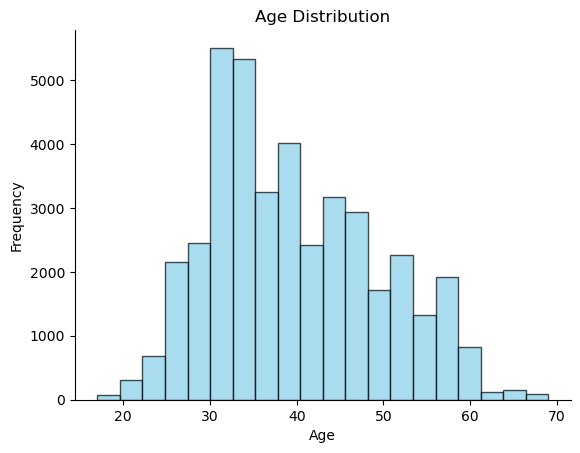

In [359]:
import matplotlib.pyplot as plt 

plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
sns.despine()
plt.show()

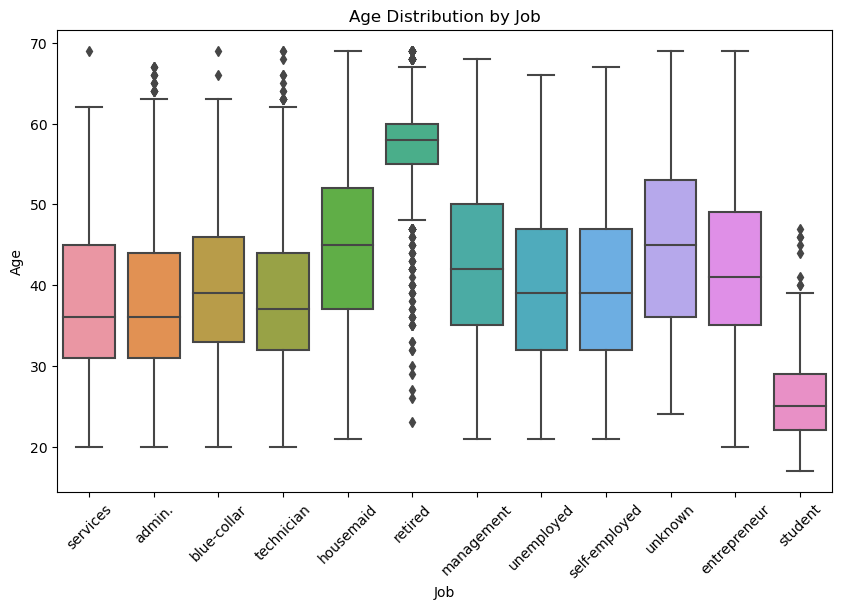

In [360]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='job', y='age', data=df)
plt.title('Age Distribution by Job')
plt.xlabel('Job')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='age', ylabel='duration'>

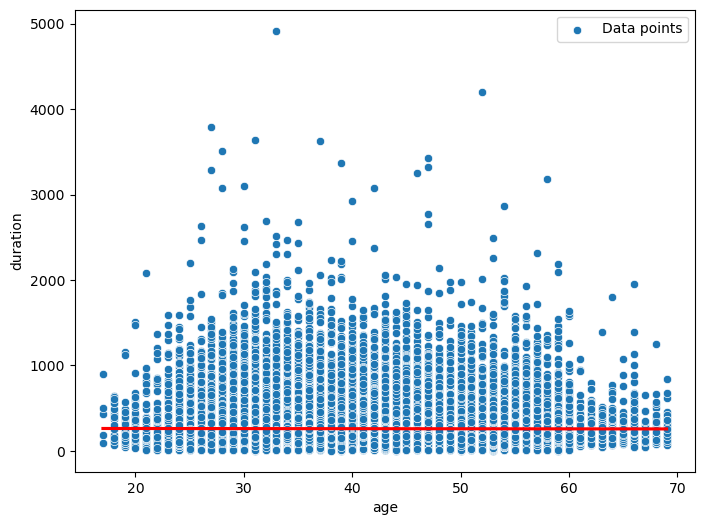

In [361]:
# Create a scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='duration', data=df, marker='o', label='Data points')
sns.regplot(x='age', y='duration', data=df, scatter=False, color='red', label='Regression Line')


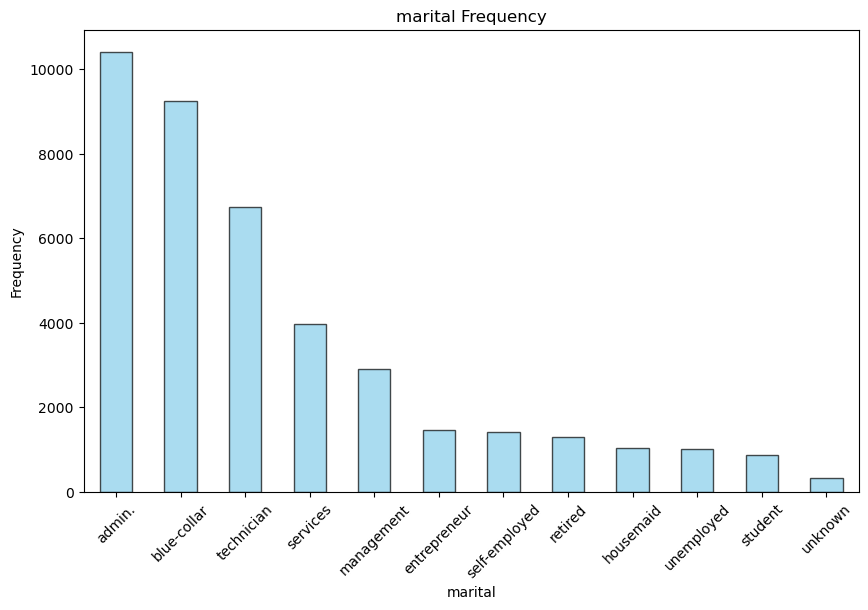

<Figure size 640x480 with 0 Axes>

In [362]:
job_counts = df['job'].value_counts()
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('marital Frequency')
plt.xlabel('marital')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
plt.savefig('maritalCount.png')

In [ ]:
plt.bar(df['month'], height=df['age'])
plt.show()


<div class='alert alert-block alert-warning
            ' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>Hypothesis Testing with t-test: [40 points]</center> </b>
</div>

In [ ]:
# You'll split your dataset into two groups based on the "marital" variable. Let's consider two groups: "married" and "single."
import pandas as pd

retired_age = df[df['job'] == 'student']['age']
services_age = df[df['job'] == 'unknown']['age']


<div style="font-size: 13pt; font-family: verdana; color: #08415C">  
    <h4>The significance level, also denoted as alpha or α, is the probability of rejecting the null hypothesis when it is true. For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.</h4> 
</div> 
<div style="font-size: 13pt; font-family: verdana; color: #08415C">  
    <h4>Уровень значимости, также обозначаемый как альфа или α, представляет собой вероятность отклонения нулевой гипотезы, когда она верна. Например, уровень значимости 0,05 указывает на 5%-ный риск сделать вывод о существовании разницы, когда фактической разницы нет.</h4> 
</div>


In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = stats.ttest_ind(retired_age, services_age)

alpha = 0.05

if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in duration between the groups.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in duration between the groups.')

print(p_value)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate example data for two groups (replace with your actual data)
np.random.seed(0)
group1_data = retired_age
group2_data = services_age

# Create histograms for both groups
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(group1_data, kde=True, color='blue', label='Group 1')
plt.title('Histogram of Group 1')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(group2_data, kde=True, color='green', label='Group 2')
plt.title('Histogram of Group 2')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

std1 = np.std(group1_data)
std2 = np.std(group2_data)
n1 = len(group1_data)
n2 = len(group2_data)

t_stat, p_value = stats.ttest_ind(group1_data, group2_data)
mean1, mean2 = np.mean(group1_data), np.mean(group2_data)



ci0 = stats.t.interval(0.95, len(group1_data) - 1, loc=mean1, scale=std1 / np.sqrt(n1))
ci = stats.t.interval(0.95, len(group2_data) - 1, loc=mean2, scale=std2 / np.sqrt(n2))
ci1 = stats.t.interval(0.95, len(group1_data) - 1, loc=mean1, scale=std1 / np.sqrt(n1))
ci2 = stats.t.interval(0.95, len(group2_data) - 1, loc=mean2, scale=std2 / np.sqrt(n2))




# Perform a t-test and calculate means and confidence intervals
'''
t_stat, p_value = stats.ttest_ind(group1_data, group2_data)
mean1, mean2 = np.mean(group1_data), np.mean(group2_data)
ci0 = stats.t.interval(0.95, len(group1_data) - 1, loc=mean1, scale=stats.sem(group1_data))
ci = stats.t.interval(0.95, len(group2_data) - 1, loc=mean2, scale=stats.sem(group2_data))
ci1 = stats.t.interval(0.95, len(group1_data) - 1, loc=mean1, scale=stats.sem(group1_data))
ci2 = stats.t.interval(0.95, len(group2_data) - 1, loc=mean2, scale=stats.sem(group2_data))
'''

# Create box plots for both groups
std1 = np.std(group1_data)
std2 = np.std(group2_data)
n1 = len(group1_data)
n2 = len(group2_data)

mean1, mean2 = np.mean(group1_data), np.mean(group2_data)
plt.figure(figsize=(8, 6))
sns.boxplot(data=[group1_data, group2_data], palette=['blue', 'green'])
plt.xticks([0, 1], ['Group 1', 'Group 2'])
plt.title('Box Plot of Group 1 and Group 2')
plt.ylabel('Values')
plt.axhline(mean1, color='red', linestyle='--', label=f'Mean: {mean1:.2f}')
plt.axhline(mean2, color='red', linestyle='--', label=f'Mean: {mean2:.2f}')

plt.axhline(ci0[0], color='green', linestyle='--', label=f'95% CI: [{ci0[0]:.2f}, {ci0[1]:.2f}]', linewidth=2)
plt.axhline(ci0[1], color='green', linestyle='--', linewidth=2)

plt.axhline(ci[0], color='blue', linestyle='--', label=f'95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]', linewidth=2)
plt.axhline(ci[1], color='blue', linestyle='--', linewidth=2)

plt.legend()
plt.show()


# Overlay means and confidence intervals on histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(group1_data, kde=True, color='blue', label='Group 1')
plt.axvline(mean1, color='red', linestyle='--', label=f'Mean: {mean1:.2f}')
plt.axvline(ci1[0], color='green', linestyle='--', label=f'95% CI: [{ci1[0]:.2f}, {ci1[1]:.2f}]', linewidth=2)
plt.axvline(ci1[1], color='green', linestyle='--', linewidth=2)
plt.title('Histogram of Group 1')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(group2_data, kde=True, color='green', label='Group 2')
plt.axvline(mean2, color='red', linestyle='--', label=f'Mean: {mean2:.2f}')
plt.axvline(ci2[0], color='blue', linestyle='--', label=f'95% CI: [{ci2[0]:.2f}, {ci2[1]:.2f}]', linewidth=2)
plt.axvline(ci2[1], color='blue', linestyle='--', linewidth=2)
plt.title('Histogram of Group 2')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Print t-test results
print(f'T-test results - t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}')
